## Predict the Temperature

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [9]:
df = pd.read_csv('clean_dataset.csv')
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [10]:
# droping some features which is not important
df = df.drop(['day','month','year'],axis=1)

In [11]:
# encoding the value of Classes 
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   243 non-null    int64  
 1   Temperature  243 non-null    int64  
 2   RH           243 non-null    int64  
 3   Ws           243 non-null    int64  
 4   Rain         243 non-null    float64
 5   FFMC         243 non-null    float64
 6   DMC          243 non-null    float64
 7   DC           243 non-null    float64
 8   ISI          243 non-null    float64
 9   BUI          243 non-null    float64
 10  FWI          243 non-null    float64
 11  Classes      243 non-null    int64  
 12  Region       243 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 24.8 KB


In [135]:
# seperating the independent and dependent features
x = df.drop('Temperature',axis=1) # independent feature
y = df['Temperature'] # Temperature will be dependent features

In [136]:
x = x.drop('Unnamed: 0',axis=1) 

In [137]:
x

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [138]:
y

0      29
1      29
2      26
3      25
4      27
       ..
238    30
239    28
240    27
241    24
242    24
Name: Temperature, Length: 243, dtype: int64

In [139]:
# splittig the dataset 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

## Feature selecting 

In [140]:
x_train

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
29,50,14,0.0,88.7,22.9,92.8,7.2,28.3,12.9,1,0
120,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,0,0
114,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7,0,0
241,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
5,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
106,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0.0,0,0
14,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0.1,0,0
92,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0.1,0,0
179,59,16,0.0,88.1,19.5,47.2,7.4,19.5,10.9,1,1


In [141]:
x_train.corr()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
RH,1.000000,0.201762,0.226259,-0.640759,-0.421517,-0.253547,-0.715106,-0.373155,-0.609419,-0.443073,-0.394121
Ws,0.201762,1.000000,0.244784,-0.169620,0.009523,0.092367,-0.004035,0.040699,0.020177,-0.062718,-0.182236
Rain,0.226259,0.244784,1.000000,-0.536790,-0.288856,-0.304328,-0.341902,-0.300998,-0.322746,-0.367767,-0.051964
FFMC,-0.640759,-0.169620,-0.536790,1.000000,0.625593,0.533040,0.748574,0.613526,0.708738,0.781730,0.251710
DMC,-0.421517,0.009523,-0.288856,0.625593,1.000000,0.870419,0.692435,0.983426,0.883802,0.619536,0.210853
DC,-0.253547,0.092367,-0.304328,0.533040,0.870419,1.000000,0.524898,0.943125,0.750205,0.551208,-0.056844
ISI,-0.715106,-0.004035,-0.341902,0.748574,0.692435,0.524898,1.000000,0.652179,0.920125,0.737184,0.290294
BUI,-0.373155,0.040699,-0.300998,0.613526,0.983426,0.943125,0.652179,1.000000,0.862592,0.616406,0.115434
FWI,-0.609419,0.020177,-0.322746,0.708738,0.883802,0.750205,0.920125,0.862592,1.000000,0.731027,0.223808
Classes,-0.443073,-0.062718,-0.367767,0.781730,0.619536,0.551208,0.737184,0.616406,0.731027,1.000000,0.177257


<Axes: >

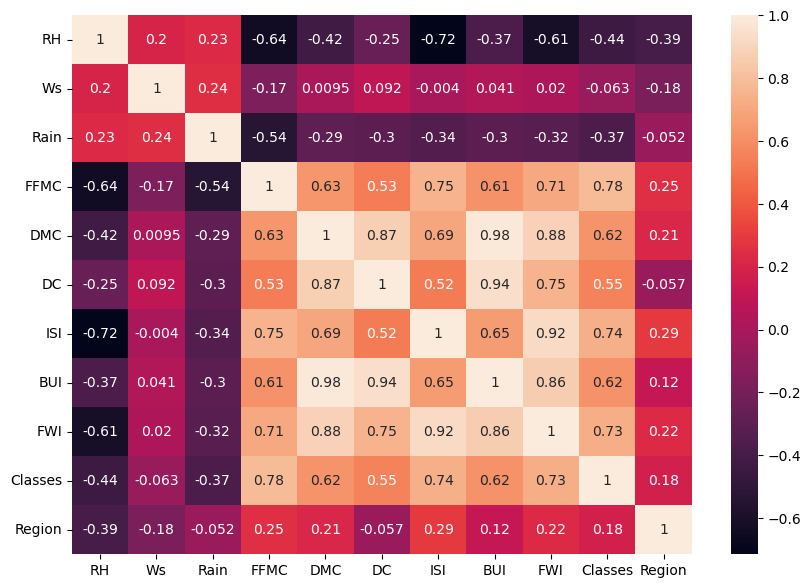

In [142]:
plt.figure(figsize=(10,7))
sns.heatmap(x_train.corr(),annot=True)

In [143]:
def select_feature(dataset,threshold):
    col_cor = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_cor.add(colname)
    return col_cor

In [144]:
corr_feature = select_feature(x_train,0.85)
corr_feature

{'BUI', 'DC', 'FWI'}

In [145]:
x_train.drop(corr_feature,axis=True,inplace=True)
x_test.drop(corr_feature,axis=True,inplace=True)

In [146]:
x_train.shape,x_test.shape

((170, 8), (73, 8))

In [147]:
# standardize the data 
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [148]:
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [149]:
x_train_scaled.shape

(170, 8)

## Linear regression

R2 Score 0.5086107117217743
Mean Absolute Error 2.001122714519331


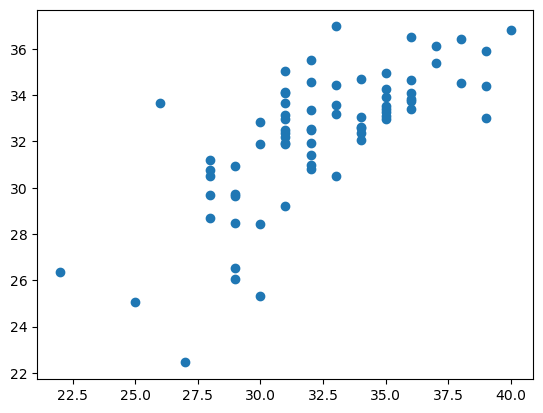

In [150]:
# this is for multi linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
regression = LinearRegression()
regression.fit(x_train_scaled,y_train)
y_pred = regression.predict(x_test_scaled)
r2score_value = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("R2 Score",r2score_value)
print("Mean Absolute Error",mae)
plt.scatter(y_test,y_pred)


## Lasso Regression

R2 Score 0.4543837034530257
Mean Absolute Error 2.123185084516282


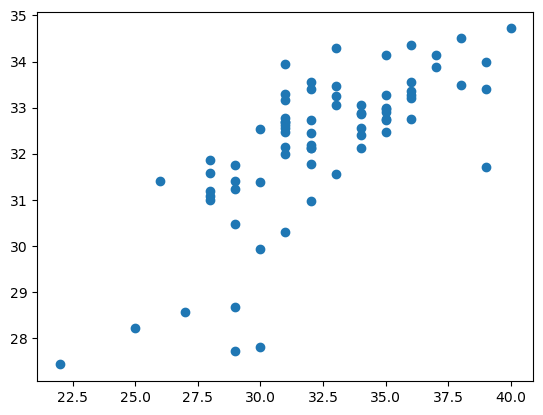

In [151]:
# this is for Lasso  regression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error
lassso_regression = Lasso()
lassso_regression.fit(x_train_scaled,y_train)
y_pred = lassso_regression.predict(x_test_scaled)
r2score_value = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("R2 Score",r2score_value)
print("Mean Absolute Error",mae)
plt.scatter(y_test,y_pred)


## Ridge Regression

R2 Score 0.510661444667541
Mean Absolute Error 1.9978124717187418


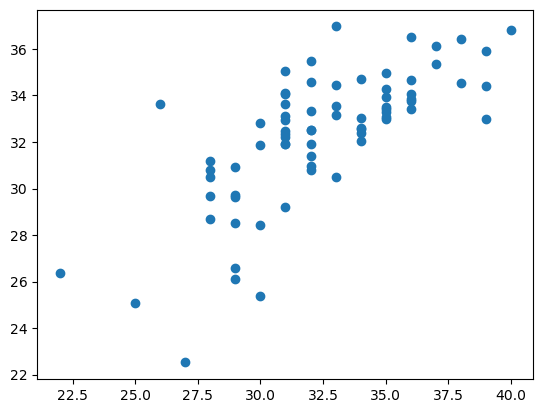

In [153]:
# this is for Ridge  regression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_absolute_error
ridge_regression = Ridge()
ridge_regression.fit(x_train_scaled,y_train)
y_pred = ridge_regression.predict(x_test_scaled)
r2score_value = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("R2 Score",r2score_value)
print("Mean Absolute Error",mae)
plt.scatter(y_test,y_pred)


## Elastic Net Regression

R2 Score 0.4923609252726663
Mean Absolute Error 2.019070652214146


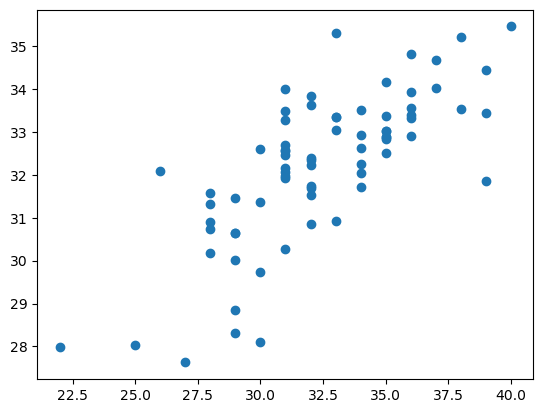

In [154]:
# this is for Elastic net  regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error
elasticnet_regression = ElasticNet()
elasticnet_regression.fit(x_train_scaled,y_train)
y_pred = elasticnet_regression.predict(x_test_scaled)
r2score_value = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("R2 Score",r2score_value)
print("Mean Absolute Error",mae)
plt.scatter(y_test,y_pred)


## Cross Validation

## LassoCV 

R2 Score 0.5497147850877853
Mean Absolute Error 1.9306591883657906


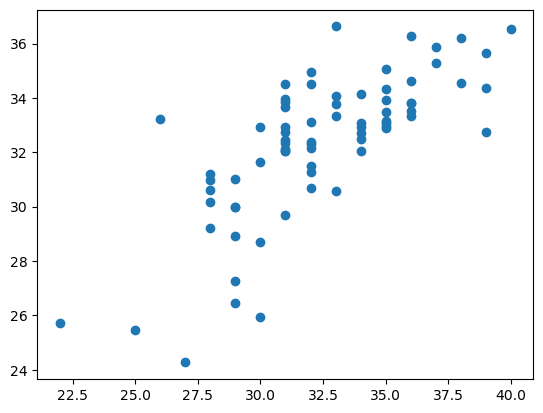

In [155]:
# this is for Lasso CV  regression
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score,mean_absolute_error
lassocv_regression = LassoCV(cv=5)
lassocv_regression.fit(x_train_scaled,y_train)
y_pred = lassocv_regression.predict(x_test_scaled)
r2score_value = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("R2 Score",r2score_value)
print("Mean Absolute Error",mae)
plt.scatter(y_test,y_pred)


## RidgeCV

R2 Score 0.524038361953408
Mean Absolute Error 1.974669891509206


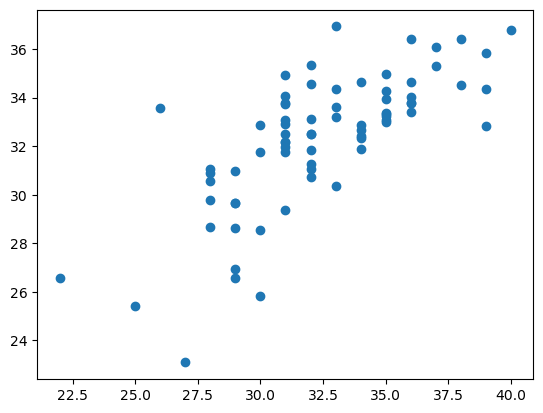

In [157]:
# this is for Ridge CV  regression
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_absolute_error
ridgecv_regression = RidgeCV(cv=5)
ridgecv_regression.fit(x_train_scaled,y_train)
y_pred = ridgecv_regression.predict(x_test_scaled)
r2score_value = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("R2 Score",r2score_value)
print("Mean Absolute Error",mae)
plt.scatter(y_test,y_pred)


## ElasticNet CV 

R2 Score 0.5504127687542346
Mean Absolute Error 1.9189055344579107


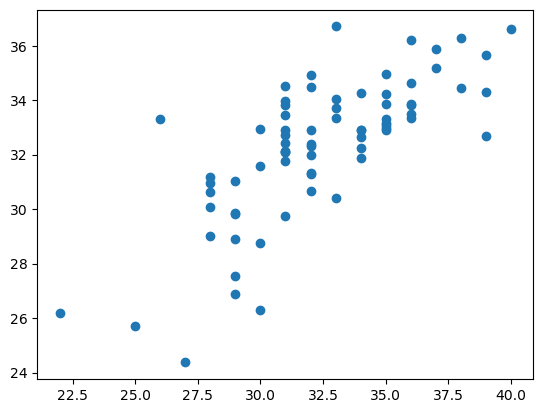

In [158]:
# this is for Elastic net CV  regression
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score,mean_absolute_error
elasticnetcv_regression = ElasticNetCV(cv=5)
elasticnetcv_regression.fit(x_train_scaled,y_train)
y_pred = elasticnetcv_regression.predict(x_test_scaled)
r2score_value = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("R2 Score",r2score_value)
print("Mean Absolute Error",mae)
plt.scatter(y_test,y_pred)


## Pickle the ML model and preprocessing model standardscaler

In [162]:
import pickle
pickle.dump(scalar,open('scalar.pkl','wb'))
pickle.dump(elasticnetcv_regression,open('model.pkl','wb'))
